# Georgia Animal Shelter Data Analytics Project
### Author: Bach Hoang Pham



As a cat lover, and also dog :), I'm always interested in seeing how data can contribute to the operation of Animal Shelter. There are alot of great projects out there that utilized data to help optimizing shelters' operations. Two great examples are:

1. Best Friend Shelter Dashboard - An organization that contributes to a goals of No-Kill Project (https://bestfriends.org/no-kill-2025/animal-shelter-statistics)
2. Shelter National Database - A centralized, standardized database for animal shelter statistics is critical for the animal welfare movement. (https://www.shelteranimalscount.org/)

Looking at these projects give me the inspiration to build my own personal insight in a smaller scale. Luckily, Georgia is one of the few states that requires its state-own shelters to submit several basic KPI monthly. The dataset and its related information can be found here: https://agr.georgia.gov/government-shelter-data-reporting

Below are the description of the database:
##### 1. Beginning Animal Counts: The current physical animal count in the shelter and in foster homes.

##### 2. Intake:

    1. Stray/at large: Stated to be unowned or free-roaming.
    2. Relinquished by owner: Admitted by owner, including adoption returns. All returns should be tracked as owner relinquishment.
    3. Owner Intended euthanasia: Limited to this definition: Admission of pets whose owner brought the pet to the shelter with the INTENT of requesting euthanasia.
    4. Transferred in from agency: An admission from another agency, for adoption, large scale seizure support, etc.
    5. Other intakes: Impounds for cruelty cases & protective custody. Also, pets born while in care, and other types of admission not captured above.
    
##### 3. Outcomes:

    1. Adoption: Final adoptions only, having permanently left the agency's possession. For example, it does NOT include animals placed in foster care or on overnight 'trial' stays.
    2. Returned to owner: Stray or Owner Relinquished animals returned to their owner.
    3. Transferred to another agency: Transferred out of the agency's possession to another entity.
    4. Returned to field: Animals included in intake, altered and returned to stray capture location to be released. This is not allowed in Georgia.
    5. Other live outcome: Barn cat programs, etc.
    6. Died in care: Animals who die, unassisted, while sheltered.
    7. Lost in care: Animals whose outcome is unknown (may have escaped the shelter, outcome was not recorded and unknown).
    8. Shelter euthanasia: All euthanasia other than that performed by the definition below as owner-intended euthanasia.
    9. Owner-intended euthanasia: Limited to this definition: Euthanasia of pets whose owner brought the pet to the shelter with the INTENT of utilizing euthanasia services.

### For this project, I will split the notebook into three main sections:
#### 1. Data Cleaning and Processing:

- As most of this were user-generated instead of machine logging, errors were expected. Furthermore, I also processed data types suitable for graph and training machine models later on.
    
    
#### 2. Exploratory Data Analysis (EDA):

- Give several insights on the dataset, and provide an overarching view of animal shelter operations in Georgia. 
- Highlight patterns, anomalies, trends, and relationships within the data.


#### 3. Machine Learning - Time Series Prediction:

- Dogs and cats ( or canine and feline, according to the data) intakes are seasonal in its nature, which can be observed during EDA. As such, I want to apply the Time Series Model to see if we can train machine to accurately predicts annually intake. 
-  Potential applications of the predictive model include:
    1. Capacity Planning: Predicting future intake and outtake rates can help shelters plan for capacity. If a higher intake is predicted for a certain period, shelters can prepare by allocating more resources, space, and staff to accommodate the influx.

    2. Resource Allocation: Accurate forecasts allow shelters to efficiently allocate resources like food, medication, and bedding. Overstocking leads to waste, while understocking can put animals at risk.
 

# Importing necessary libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

from math import pi
#from palettable.colorbrewer.qualitative import Pastel1_7

# Suppress specific warnings from pandas
pd.options.mode.chained_assignment = None

# Suppress warnings in general (use with caution)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('shelter-report-data-export-september-2023.xlsx')
df = df.drop(columns=['Unnamed: 10'])

#Project the number of rows and columns
print(df.shape)


(5746, 34)


# Data Cleaning & Data Processing

In [4]:
# Assuming df is already loaded
headers = df.iloc[0]
df = pd.DataFrame(df.values[1:], columns=headers)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Display the DataFrame
df

,Report Period Start,Report Period End,License Number,Shelter Name,Canine starting animal count,Feline starting animal count,Canine stray at large,Feline stray at large,Canine relinquished by owner,Feline relinquished by owner,...,Canine other live outcome,Feline other live outcome,Canine died in care,Feline died in care,Canine lost in care,Feline list in care,Canine shelter euthanasia,Feline shelter euthanasia,Canine owner intended euthanasia,Feline owner intended euthanasia
0,2020-07-01,2020-07-31,33105331,ALAPAHA ANIMAL CONTROL/SHELTER,0,0,12,3,3,0,...,0,0,0,0,0,1,0,0,0,0
1,2020-08-01,2020-08-31,33105331,ALAPAHA ANIMAL CONTROL/SHELTER,27,11,18,11,9,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-09-01,2020-09-30,33105331,ALAPAHA ANIMAL CONTROL/SHELTER,2,10,2,10,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-10-01,2020-10-31,33105331,ALAPAHA ANIMAL CONTROL/SHELTER,11,0,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-11-01,2020-11-30,33105331,ALAPAHA ANIMAL CONTROL/SHELTER,6,13,5,13,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5740,2023-05-01,2023-05-31,3396397,WORTH COUNTY ANIMAL SHELTER,75,43,50,46,6,7,...,0,28,0,3,0,0,31,11,0,0
5741,2023-06-01,2023-06-30,3396397,WORTH COUNTY ANIMAL SHELTER,53,75,56,78,7,3,...,0,36,0,2,0,0,24,1,0,0
5742,2023-07-01,2023-07-31,3396397,WORTH COUNTY ANIMAL SHELTER,80,67,52,47,15,6,...,0,43,0,2,0,0,35,3,0,0
5743,2023-08-01,2023-08-31,3396397,WORTH COUNTY ANIMAL SHELTER,80,78,56,27,19,17,...,0,21,1,1,0,0,38,9,0,0


In [5]:
pd.set_option('display.max_columns', None)
df.info
df.describe(include="all", exclude = None)


,Report Period Start,Report Period End,License Number,Shelter Name,Canine starting animal count,Feline starting animal count,Canine stray at large,Feline stray at large,Canine relinquished by owner,Feline relinquished by owner,Canine intake owner intended euthanasia,Feline intake owner intended euthanasia,Canine transferred in from agency,Feline transferred in from agency,Canine other intakes,Feline other intakes,Canine adoption,Feline adoption,Canine returned to owner,Feline returned to owner,Canine transferred to another agency,Feline transferred to another agency,Canine returned to field,Feline returned to field,Canine other live outcome,Feline other live outcome,Canine died in care,Feline died in care,Canine lost in care,Feline list in care,Canine shelter euthanasia,Feline shelter euthanasia,Canine owner intended euthanasia,Feline owner intended euthanasia
count,5745,5745,5745,5745,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0,5745.0
unique,NaN,NaN,160,167,289.0,265.0,278.0,224.0,131.0,125.0,32.0,38.0,39.0,37.0,109.0,58.0,180.0,161.0,130.0,48.0,146.0,172.0,1.0,1.0,45.0,52.0,22.0,31.0,10.0,11.0,103.0,112.0,38.0,41.0
top,NaN,NaN,33105331,ALAPAHA ANIMAL CONTROL/SHELTER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,NaN,NaN,39,39,776.0,2247.0,827.0,2086.0,2510.0,3333.0,4942.0,5295.0,5137.0,5441.0,3958.0,4690.0,2430.0,3087.0,1592.0,4251.0,1600.0,2738.0,5745.0,5745.0,5243.0,5183.0,4640.0,4359.0,5564.0,5429.0,2548.0,3124.0,4926.0,5266.0
mean,2022-02-04 04:12:54.516971520,2022-03-05 14:32:16.292428032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2020-07-01 00:00:00,2020-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2021-05-01 00:00:00,2021-05-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2022-02-01 00:00:00,2022-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022-12-01 00:00:00,2022-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2023-09-01 00:00:00,2023-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For some reason, there are Object type value. Need to turn these into INT type.

In [6]:
# Assuming df is your dataframe
columns_to_convert = df.columns[4:]

for col in columns_to_convert:
    df[col] = df[col].astype(int)
    
# Reset the index
df.reset_index(drop=True, inplace=True)

df.describe()

,Report Period Start,Report Period End,Canine starting animal count,Feline starting animal count,Canine stray at large,Feline stray at large,Canine relinquished by owner,Feline relinquished by owner,Canine intake owner intended euthanasia,Feline intake owner intended euthanasia,Canine transferred in from agency,Feline transferred in from agency,Canine other intakes,Feline other intakes,Canine adoption,Feline adoption,Canine returned to owner,Feline returned to owner,Canine transferred to another agency,Feline transferred to another agency,Canine returned to field,Feline returned to field,Canine other live outcome,Feline other live outcome,Canine died in care,Feline died in care,Canine lost in care,Feline list in care,Canine shelter euthanasia,Feline shelter euthanasia,Canine owner intended euthanasia,Feline owner intended euthanasia
count,5745,5745,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.0,5745.0,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000,5745.000000
mean,2022-02-04 04:12:54.516971520,2022-03-05 14:32:16.292428032,38.280940,24.665100,41.138555,23.454482,9.959965,8.048912,0.774587,0.434465,0.612533,0.426980,4.459878,1.754047,12.514708,10.247868,10.029939,1.010444,16.856397,13.390775,0.0,0.0,0.622628,0.896258,0.440383,1.024717,0.055701,0.086858,6.576675,6.251349,0.934726,0.508790
min,2020-07-01 00:00:00,2020-07-31 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-05-01 00:00:00,2021-05-31 00:00:00,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022-02-01 00:00:00,2022-02-28 00:00:00,17.000000,5.000000,16.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000,0.000000,7.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2022-12-01 00:00:00,2022-12-31 00:00:00,41.000000,27.000000,45.000000,29.000000,12.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,13.000000,10.000000,13.000000,1.000000,23.000000,15.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,6.000000,0.000000,0.000000
max,2023-09-01 00:00:00,2023-09-30 00:00:00,4542.000000,2315.000000,41219.000000,429.000000,280.000000,299.000000,41.000000,63.000000,117.000000,73.000000,224.000000,156.000000,294.000000,296.000000,198.000000,77.000000,199.000000,261.000000,0.0,0.0,107.000000,64.000000,40.000000,51.000000,29.000000,17.000000,167.000000,218.000000,180.000000,62.000000
std,NaN,NaN,101.061696,58.684113,545.657375,41.171622,19.455993,20.529563,2.859679,2.781742,3.470466,2.767689,13.799001,6.556449,29.588329,24.381353,17.600907,3.936857,24.470573,26.913328,0.0,0.0,3.671387,4.501086,1.452583,2.973434,0.610119,0.510962,13.599131,14.925658,4.569384,3.142612


According to this summary, apparently there were two instances of data entry errors:
1. During May 2023 for Hall County Animal Shelter. 4542 starting canine for a shelter that averagely has 200-300 dogs.
2. During September 2022, Dekalb County Shleter has 41,219 Canine stray intake.

I will replace these outliers with an average of the previous years for the same month.

In [7]:
# Convert 'Report Period Start' to datetime for accurate indexing
df['Report Period Start'] = pd.to_datetime(df['Report Period Start'])

# Filter for the 'HALL COUNTY ANIMAL SHELTER' rows
filtered_df = df[df['Shelter Name'] == 'HALL COUNTY ANIMAL SHELTER']

# Calculate the average for May of the previous three years
average_canine = filtered_df[filtered_df['Report Period Start'].isin([ '2021-05-01', '2022-05-01'])]['Canine starting animal count'].mean()
average_feline = filtered_df[filtered_df['Report Period Start'].isin([ '2021-05-01', '2022-05-01'])]['Feline starting animal count'].mean()

# Replace the outlier values for '5/1/2023' with the calculated averages
df.loc[(df['Report Period Start'] == '2023-05-01') & (df['Shelter Name'] == 'HALL COUNTY ANIMAL SHELTER'), 'Canine starting animal count'] = average_canine
df.loc[(df['Report Period Start'] == '2023-05-01') & (df['Shelter Name'] == 'HALL COUNTY ANIMAL SHELTER'), 'Feline starting animal count'] = average_feline

# Check for the outlier in September 2022
outlier_condition = (df['Report Period Start'].dt.year == 2022) & (df['Report Period Start'].dt.month == 9) & (df['Shelter Name'] == "DEKALB COUNTY ANIMAL SERVICES")

# Calculate the average for September of 2020 and 2021
september_condition = df['Report Period Start'].dt.month == 9
average = df.loc[september_condition & (df['Report Period Start'].dt.year != 2022), 'Canine stray at large'].mean()

# Replace the outlier with the average
df.loc[outlier_condition, 'Canine stray at large'] = average

In [8]:
# Define the outcome columns for both canines and felines
outcome_columns = [
    'Canine adoption', 'Feline adoption', 
    'Canine returned to owner', 'Feline returned to owner', 
    'Canine transferred to another agency', 'Feline transferred to another agency', 
    'Canine returned to field', 'Feline returned to field', 
    'Canine other live outcome', 'Feline other live outcome', 
    'Canine died in care', 'Feline died in care', 
    'Canine lost in care', 'Feline list in care', 
    'Canine shelter euthanasia', 'Feline shelter euthanasia', 
    'Canine owner intended euthanasia', 'Feline owner intended euthanasia'
]

# Subset the DataFrame into canine and feline outcomes
canine_df = df[[col for col in outcome_columns if 'Canine' in col]]
feline_df  = df[[col for col in outcome_columns if 'Feline' in col]]

# Exploratory Data Analysis

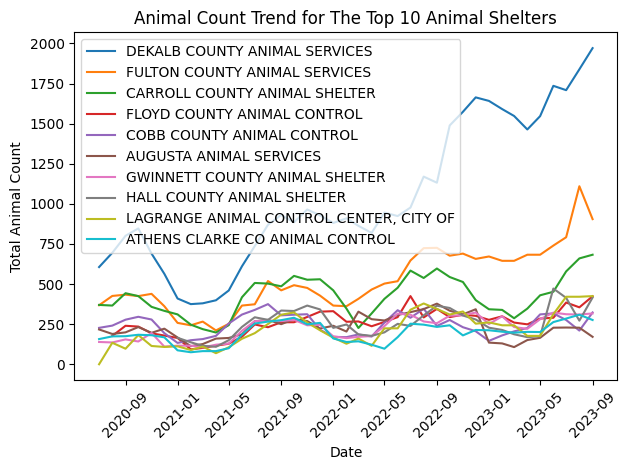

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Report Period Start' column to datetime type
df['Report Period Start'] = pd.to_datetime(df['Report Period Start'])

# Calculate top 10 shelters based on total animal count
top_shelters = df.groupby('Shelter Name').agg({'Feline starting animal count': 'sum', 'Canine starting animal count': 'sum'})
top_shelters['Total'] = top_shelters['Feline starting animal count'] + top_shelters['Canine starting animal count']
top_shelters['Total'] = pd.to_numeric(top_shelters['Total'], errors='coerce')

top_10_shelters = top_shelters.nlargest(10, 'Total').index.tolist()

# Filter out the top 10 shelters
df_top_10 = df[df['Shelter Name'].isin(top_10_shelters)]

# Group by 'Report Period Start' and 'Shelter Name', then aggregate
grouped = df_top_10.groupby(['Report Period Start', 'Shelter Name']).agg({'Feline starting animal count': 'sum', 'Canine starting animal count': 'sum'})
grouped['Total Animal Count'] = grouped['Feline starting animal count'] + grouped['Canine starting animal count']

# Plotting
for shelter in top_10_shelters:
    shelter_data = grouped.xs(shelter, level='Shelter Name')
    plt.plot(shelter_data.index, shelter_data['Total Animal Count'], label=shelter)

plt.xlabel('Date')
plt.ylabel('Total Animal Count')
plt.title("Animal Count Trend for The Top 10 Animal Shelters")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


The graph presents a trend of total animal counts from the top 10 animal shelters over a period from September 2020 to September 2023. It appears to show fluctuating counts for each shelter, with some having more pronounced changes over time. For example, DeKalb County Animal Services shows a significant upward trend, especially noticeable after January 2023. In contrast, most other shelters display more moderate increases or decreases throughout the observed period. The graph could indicate various factors at play, such as seasonal variations in animal intake, the impact of local policies, or the effectiveness of adoption campaigns.

In [10]:
# Calculate the total number of outcomes for canines and felines
canine_totals = canine_df.sum()
feline_totals = feline_df.sum()

# Create a DataFrame for the counts
canine_outcomes = pd.DataFrame({'outcome_type': canine_totals.index, 'count': canine_totals.values})
feline_outcomes = pd.DataFrame({'outcome_type': feline_totals.index, 'count': feline_totals.values})


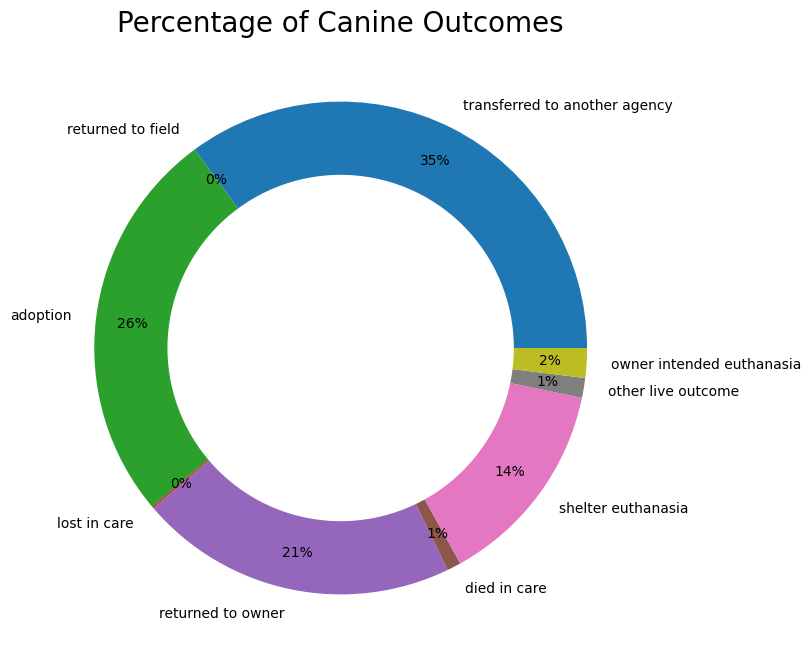

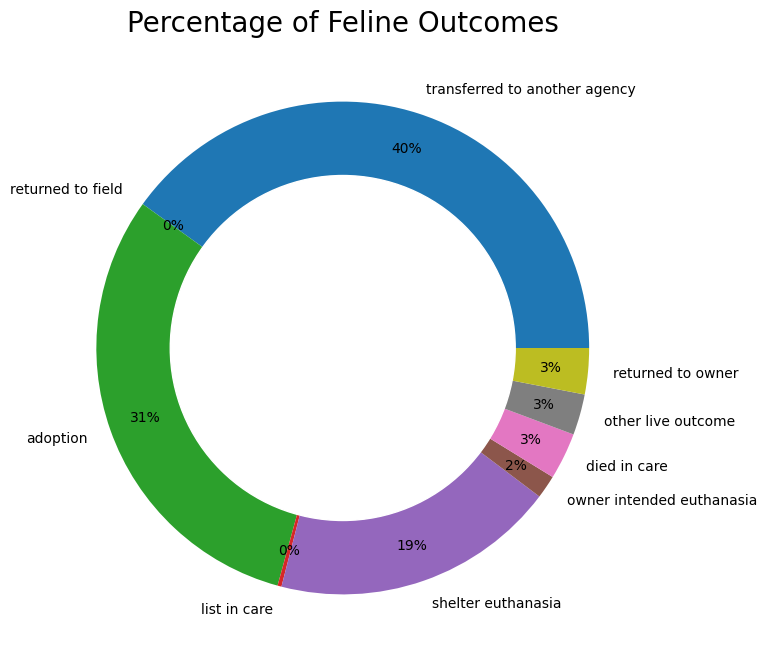

In [11]:
#As the oringal chart is too clustered, with label and % overlapping on each other. Including the below function to sort it in 
#certain order to de-cluster the plot
def alternate_sort(df):
    # Sort the DataFrame to find the largest and smallest values
    df_sorted = df.sort_values(by='count', ascending=False).reset_index(drop=True)
    # List to hold the alternately sorted outcomes
    alternate_sorted_list = []
    # Add the largest and smallest outcomes to the list in alternating order
    while len(df_sorted) > 0:
        alternate_sorted_list.append(df_sorted.iloc[0])
        df_sorted = df_sorted.drop(df_sorted.index[0])
        if len(df_sorted) > 0:
            alternate_sorted_list.append(df_sorted.iloc[-1])
            df_sorted = df_sorted.drop(df_sorted.index[-1])
    # Concatenate the list into a new DataFrame
    alternate_sorted_df = pd.concat(alternate_sorted_list, axis=1).transpose()
    return alternate_sorted_df

# Apply the sorting function to both canine and feline outcomes
canine_outcomes_sorted = alternate_sort(canine_outcomes)
feline_outcomes_sorted = alternate_sort(feline_outcomes)

# Function to plot pie chart
def plot_pie_chart(outcomes_sorted, title, circle_radius=0.7):
    plt.figure(figsize=(8, 8))
    labels = outcomes_sorted['outcome_type'].str.replace('Canine ', '').str.replace('Feline ', '')
    sizes = outcomes_sorted['count']
    plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=0.85, labeldistance=1.1)
    my_circle = plt.Circle((0, 0), circle_radius, color='white')
    p = plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(title, fontsize=20)
    plt.show()

# Plot the charts for canines and felines with the new sorting
plot_pie_chart(canine_outcomes_sorted, 'Percentage of Canine Outcomes')
plot_pie_chart(feline_outcomes_sorted, 'Percentage of Feline Outcomes')

The data suggest that both adoption and transfer to other agencies are vital pathways for animals in the shelter. The transfer rates, especially for felines, are remarkably high, which may point to an extensive network of facility partnerships or a need for specialized care not available at the original shelter.

The euthanasia rates, while significant, are lower than the more positive outcomes of adoption and return to owners. This may indicate effective shelter practices in rehoming and medical care. However, the shelter euthanasia rates still highlight the ongoing challenges that shelters face regarding animal overpopulation, health issues, and behavioral concerns that make rehoming difficult.

The very low percentages of "Returned to Field" for both canines and felines in this data set are particularly noteworthy. This  could reflect a policy or data capture issue.

This also brings a nuanced picture when comparing canines and felines. Cats are adopted out more frequently than dogs, which may suggest either a preference for cats among adopters or a higher suitability for adoption scenarios. On the other hand, dogs are returned to their original owners at a significantly higher rate than cats, indicating that dogs may be more likely to be microchipped or otherwise identifiable, facilitating their return. Transfers to other agencies are more common with cats, which could reflect higher demand in other facilities or more proactive rescue efforts by feline-specific organizations. 

A stark difference is observed in shelter euthanasia, where cats are more frequently euthanized than dogs, a statistic that could highlight less favorable conditions for cats in shelters or more severe health or behavioral problems. Dogs are slightly more likely to undergo euthanasia at the request of their owners, possibly due to different owner attitudes towards medical issues or care options. 





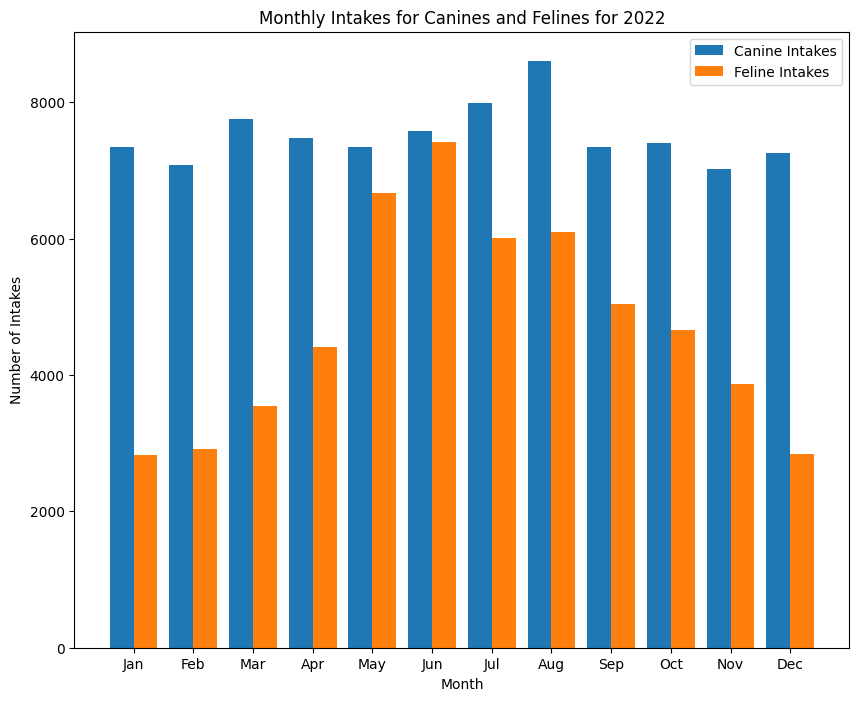

In [12]:
# Filter rows for the year 2022 and assign to df_2022
df_2022 = df[(df['Report Period Start'].dt.year == 2022) | (df['Report Period End'].dt.year == 2022)]

# Create a month column based on 'Report Period Start'
df_2022['Month'] = df_2022['Report Period Start'].dt.month

# Group by the new month column and sum up the intakes for each intake type
monthly_intakes_2022 = df_2022.groupby('Month').agg({
    'Canine stray at large': 'sum',
    'Feline stray at large': 'sum',
    'Canine relinquished by owner': 'sum',
    'Feline relinquished by owner': 'sum',
    'Canine intake owner intended euthanasia': 'sum',
    'Feline intake owner intended euthanasia': 'sum',
    'Canine transferred in from agency': 'sum',
    'Feline transferred in from agency': 'sum',
    'Canine other intakes': 'sum',
    'Feline other intakes': 'sum'
}).reset_index()

# Separate the canine and feline data
canine_intakes_2022 = monthly_intakes_2022[['Month', 'Canine stray at large', 'Canine relinquished by owner', 'Canine intake owner intended euthanasia', 'Canine transferred in from agency', 'Canine other intakes']].set_index('Month')
feline_intakes_2022 = monthly_intakes_2022[['Month', 'Feline stray at large', 'Feline relinquished by owner', 'Feline intake owner intended euthanasia', 'Feline transferred in from agency', 'Feline other intakes']].set_index('Month')

# Sum up the total intakes for canines and felines
canine_intakes_2022['Total Canine Intakes'] = canine_intakes_2022.sum(axis=1)
feline_intakes_2022['Total Feline Intakes'] = feline_intakes_2022.sum(axis=1)

# Plot the data using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

# Plotting canine intakes for 2022
plt.bar(canine_intakes_2022.index - 0.2, canine_intakes_2022['Total Canine Intakes'], width=0.4, label='Canine Intakes')

# Plotting feline intakes for 2022
plt.bar(feline_intakes_2022.index + 0.2, feline_intakes_2022['Total Feline Intakes'], width=0.4, label='Feline Intakes')

# Add some labels and a title
plt.xlabel('Month')
plt.ylabel('Number of Intakes')
plt.title('Monthly Intakes for Canines and Felines for 2022')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

# Show the plot
plt.show()

import warnings
warnings.filterwarnings('ignore')

Across all months, canine intakes are consistently higher than those of felines, suggesting a greater frequency of canine admissions into shelters. Notably, both canines and felines show a significant increase in intakes during the summer months, with June and July recording the highest numbers for canines, which could indicate a seasonal pattern related to pet relinquishment or stray populations. The data then shows a gradual decline in intakes as the year progresses towards winter, with December registering the lowest intake numbers for both categories. 

This downward trend as the year ends might reflect a decrease in stray animal occurrences or a rise in successful adoption events during the holiday season. The consistent gap between canine and feline intakes month-over-month might reflect a larger population of stray or relinquished dogs, or perhaps a difference in community behaviors towards these two animal types. 

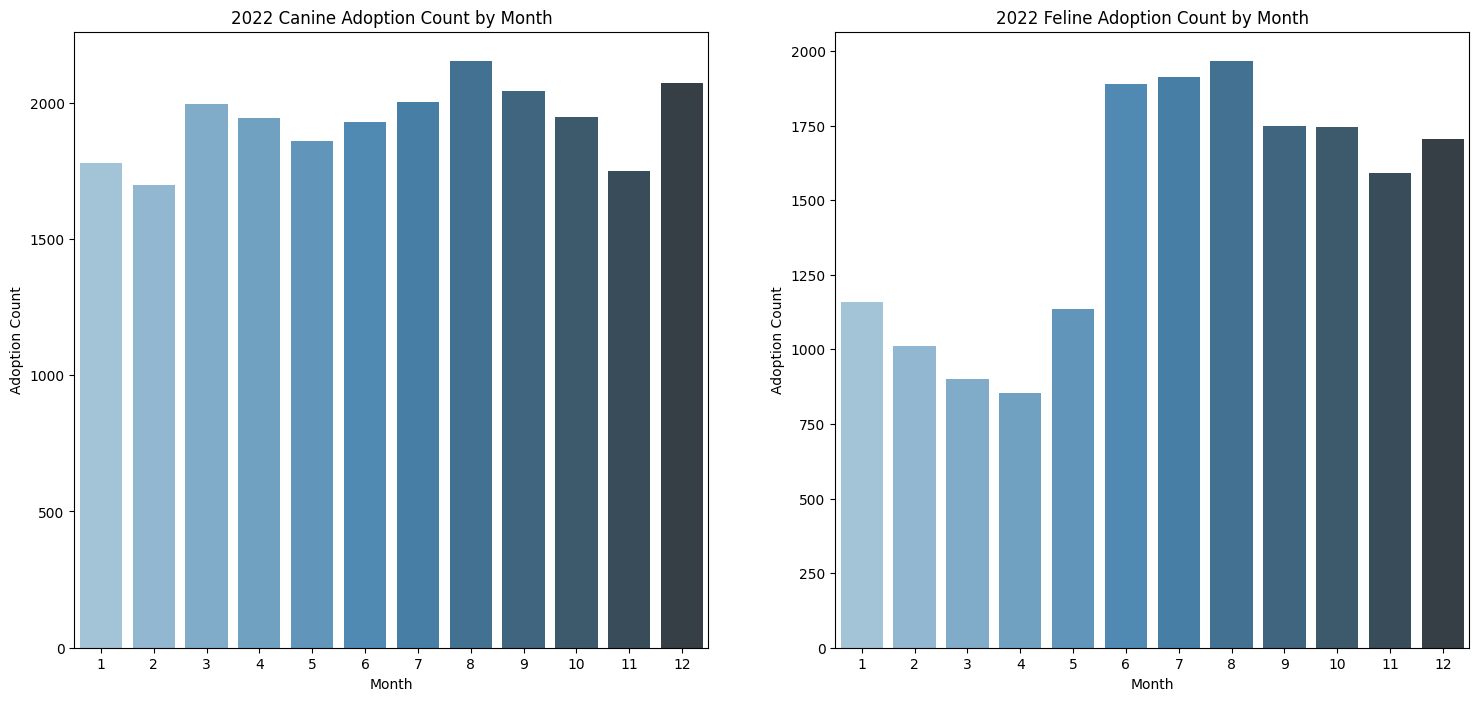

In [13]:
# Convert 'Report Period Start' to datetime if it's not already
df['Report Period Start'] = pd.to_datetime(df['Report Period Start'])

# Filter for records from the year 2022
df_2022 = df[df['Report Period Start'].dt.year == 2022]

# Creating a column for month
df_2022['Adoption Month'] = df_2022['Report Period Start'].dt.month

# Group by month for canine adoptions
canine_adoption_counts = df_2022.groupby(['Adoption Month'])['Canine adoption'].sum().reset_index()

# Group by month for feline adoptions
feline_adoption_counts = df_2022.groupby(['Adoption Month'])['Feline adoption'].sum().reset_index()

# Plot the bar charts
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.barplot(x='Adoption Month', y='Canine adoption', data=canine_adoption_counts, palette='Blues_d')
plt.title('2022 Canine Adoption Count by Month')
plt.xlabel('Month')
plt.ylabel('Adoption Count')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(x='Adoption Month', y='Feline adoption', data=feline_adoption_counts, palette='Blues_d')
plt.title('2022 Feline Adoption Count by Month')
plt.xlabel('Month')
plt.ylabel('Adoption Count')

plt.show()


For both canines and felines, February has the lowest adoption rates. This could be attributed to post-holiday effects or colder weather which might deter people from adopting pets.The summer months have high adoption rates for both animals, possibly due to better weather conditions and the timing of vacation periods allowing families to adjust to new pets.
The adoption counts for canines remain relatively more consistent across the year compared to felines, which show more variability and a sharper peak in the summer months.

# Machine Learning - ARIMA MODEL

The ARIMA model, which stands for AutoRegressive Integrated Moving Average, is a popular statistical method used for forecasting time series data, where "time series" refers to data points collected or observed at successive points in time.

In the context of predicting animal shelter counts, an ARIMA model would analyze historical data on animal arrivals at the shelter. It would consider patterns (like increases during certain months), smooth out irregularities (like an unexpected drop or spike in arrivals), and then use this information to forecast future counts.

This prediction can be incredibly useful for shelter management, as it can help in planning resources, managing space, and even guiding adoption campaigns. For instance, if the model predicts a higher intake in the summer, the shelter could prepare by allocating more resources during that period.

## Canine Prediction

In [14]:
from pathlib import Path

import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.graphics import tsaplots
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


%matplotlib inline


In [15]:
deklab_df = df[df['Shelter Name'] == "DEKALB COUNTY ANIMAL SERVICES"][['Report Period Start', 'Canine starting animal count']]
deklab_df.columns = deklab_df.columns.str.replace(' ', '_')

In [16]:
#Showing the first five rows
deklab_df.head()

,Report_Period_Start,Canine_starting_animal_count
2731,2020-07-01,247
2732,2020-08-01,265
2733,2020-09-01,262
2734,2020-10-01,277
2735,2020-11-01,276


In [17]:
# convert the date information to a datetime object
deklab_df['Date'] = pd.to_datetime(deklab_df.Report_Period_Start)

# convert dataframe column to series (name is used to label the data)
deklab_df_ts = pd.Series(deklab_df.Canine_starting_animal_count.values, index=deklab_df.Date, name='Canine_Count')

# define the time series frequency
deklab_df_ts.index = pd.DatetimeIndex(deklab_df_ts.index, freq=deklab_df_ts.index.inferred_freq)

In [18]:
deklab_df_ts.head()

Date
2020-07-01    247
2020-08-01    265
2020-09-01    262
2020-10-01    277
2020-11-01    276
Freq: MS, Name: Canine_Count, dtype: int64

### Finding the best Parameters for the model

In [19]:
# Evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    #print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# Assuming `deklab_df_ts` is your preloaded dataset
# and you've already preprocessed it accordingly

# Evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(deklab_df_ts.values, p_values, d_values, q_values)

Best ARIMA(8, 1, 2) RMSE=64.820


### Running the model and show its predictions

In [20]:
# partition the data
nValid = 12
nTrain = len(deklab_df_ts) - nValid

train_ts = deklab_df_ts[:nTrain]
valid_ts = deklab_df_ts[nTrain:]

from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_ts, order=(8, 1, 2))
arima_result = arima_model.fit()

# Forecast the next nValid periods
arima_forecast = arima_result.get_forecast(steps=nValid)
forecast_series = arima_forecast.predicted_mean
forecast_conf_int = arima_forecast.conf_int()


# Get the forecast of future points
forecast = arima_result.get_forecast(steps=nValid)
predicted_mean = forecast.predicted_mean

# The forecast object also contains confidence intervals, which you could include
confidence_intervals = forecast.conf_int()

# Gather the actual values from the validation set
actual_values = valid_ts

# Create a DataFrame for comparing actual vs. predicted
comparison_df = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_mean})

# Optionally, you could add the confidence intervals to your comparison
comparison_df['Lower CI'] = confidence_intervals.iloc[:, 0]
comparison_df['Upper CI'] = confidence_intervals.iloc[:, 1]

# Display the DataFrame
print(comparison_df)

            Actual    Predicted     Lower CI     Upper CI
2022-10-01     949  1029.834887   965.095530  1094.574244
2022-11-01    1040  1144.905685  1028.438960  1261.372409
2022-12-01    1152  1269.408381  1103.618003  1435.198760
2023-01-01    1180  1341.778234  1109.404873  1574.151595
2023-02-01    1208  1369.111205  1067.813559  1670.408851
2023-03-01    1233  1379.409737  1019.970766  1738.848709
2023-04-01    1190  1388.523587   977.375247  1799.671928
2023-05-01    1298  1398.523944   941.966627  1855.081262
2023-06-01    1300  1411.567871   913.325688  1909.810054
2023-07-01    1277  1453.617538   916.112413  1991.122662
2023-08-01    1276  1525.892442   949.539960  2102.244924
2023-09-01    1362  1604.353781   984.549870  2224.157693


### Plotting the Prediction

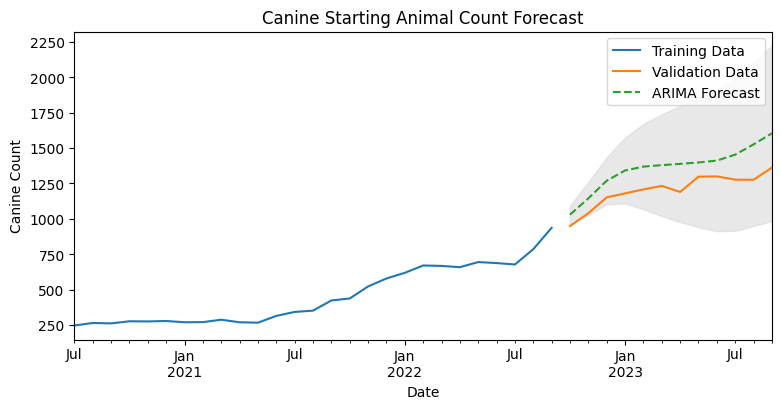

In [21]:
# Plot the forecast along with the historical data
fig, ax = plt.subplots(figsize=(9, 4))
train_ts.plot(ax=ax, label='Training Data')
valid_ts.plot(ax=ax, label='Validation Data')
forecast_series.plot(ax=ax, style='--', label='ARIMA Forecast')

# Fill the confidence interval
ax.fill_between(forecast_conf_int.index, 
                forecast_conf_int.iloc[:, 0], 
                forecast_conf_int.iloc[:, 1], color='lightgrey', alpha=0.5)

ax.set_title('Canine Starting Animal Count Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Canine Count')
ax.legend()
plt.show()

The shaded area around the ARIMA forecast indicates the uncertainty or confidence interval of the predictions; the wider this area, the less certain the model is about its forecasts. The graph suggests that the ARIMA model expects the canine count to continue increasing, which is in line with the trend observed in the training data.

## Feline Prediction

In [22]:
Feline_df = df[df['Shelter Name'] == "FULTON COUNTY ANIMAL SERVICES"][['Report Period Start', 'Feline starting animal count']]
Feline_df.columns = Feline_df.columns.str.replace(' ', '_')

In [23]:
# convert the date information to a datetime object
Feline_df['Date'] = pd.to_datetime(Feline_df.Report_Period_Start)

# convert dataframe column to series (name is used to label the data)
Feline_df_ts = pd.Series(Feline_df.Feline_starting_animal_count.values, index=Feline_df.Date, name='Feline_Count')

# define the time series frequency
Feline_df_ts.index = pd.DatetimeIndex(Feline_df_ts.index, freq=Feline_df_ts.index.inferred_freq)

Feline_df_ts.head()

Date
2020-07-01    169.0
2020-08-01    209.0
2020-09-01    230.0
2020-10-01    235.0
2020-11-01    218.0
Freq: MS, Name: Feline_Count, dtype: float64

In [24]:
# Evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.7)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    #print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    
# Evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(Feline_df_ts.values, p_values, d_values, q_values)

Best ARIMA(0, 0, 2) RMSE=41.773


In [25]:
# partition the data
nValid = 12
nTrain = len(Feline_df_ts) - nValid

train_ts = Feline_df_ts[:nTrain]
valid_ts = Feline_df_ts[nTrain:]

arima_model = ARIMA(train_ts, order=(0, 0, 2))
arima_result = arima_model.fit()

# Forecast the next nValid periods
arima_forecast = arima_result.get_forecast(steps=nValid)
forecast_series = arima_forecast.predicted_mean
forecast_conf_int = arima_forecast.conf_int()


# Get the forecast of future points
forecast = arima_result.get_forecast(steps=nValid)
predicted_mean = forecast.predicted_mean

# The forecast object also contains confidence intervals, which you could include
confidence_intervals = forecast.conf_int()

# Gather the actual values from the validation set
actual_values = valid_ts

# Create a DataFrame for comparing actual vs. predicted
comparison_df = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_mean})

# Optionally, you could add the confidence intervals to your comparison
comparison_df['Lower CI'] = confidence_intervals.iloc[:, 0]
comparison_df['Upper CI'] = confidence_intervals.iloc[:, 1]

# Display the DataFrame
print("ARIMA Prediction: ")
print()
print(comparison_df)

ARIMA Prediction: 

            Actual   Predicted   Lower CI    Upper CI
2022-10-01   147.0  155.441582  92.123231  218.759934
2022-11-01   135.0  133.675417  38.057876  229.292957
2022-12-01    97.0  117.118430  11.422373  222.814487
2023-01-01    99.0  117.118430  11.422373  222.814487
2023-02-01    73.0  117.118430  11.422373  222.814487
2023-03-01    64.0  117.118430  11.422373  222.814487
2023-04-01    77.0  117.118430  11.422373  222.814487
2023-05-01    61.0  117.118430  11.422373  222.814487
2023-06-01   145.0  117.118430  11.422373  222.814487
2023-07-01   223.0  117.118430  11.422373  222.814487
2023-08-01   279.0  117.118430  11.422373  222.814487
2023-09-01   163.0  117.118430  11.422373  222.814487


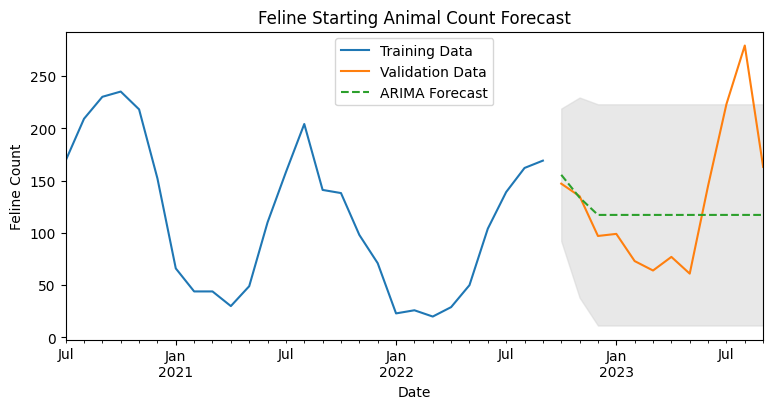

In [26]:
# Plot the forecast along with the historical data
fig, ax = plt.subplots(figsize=(9, 4))
train_ts.plot(ax=ax, label='Training Data')
valid_ts.plot(ax=ax, label='Validation Data')
forecast_series.plot(ax=ax, style='--', label='ARIMA Forecast')

# Fill the confidence interval
ax.fill_between(forecast_conf_int.index, 
                forecast_conf_int.iloc[:, 0], 
                forecast_conf_int.iloc[:, 1], color='lightgrey', alpha=0.5)

ax.set_title('Feline Starting Animal Count Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Feline Count')
ax.legend()
plt.show()

As with the evaluation model above, we can see that the parameter that adjusts ARIMA to the Mean value outperform all the other parameters, even though it doesn't fit into the seasonal trend of the feline. 

Prefer to this interesting discussion regarding Mean Forecasting vs ARIMA: https://stats.stackexchange.com/questions/124955/is-it-unusual-for-the-mean-to-outperform-arima/125016#125016

#### Example of a more fitting model, however with worse overall accuracy (RSME):

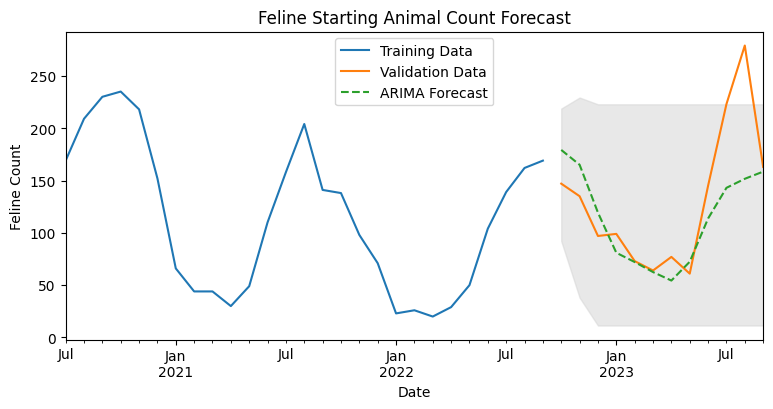

In [27]:
# partition the data

arima_model_2 = ARIMA(train_ts, order=(8, 0, 2))
arima_result_2 = arima_model_2.fit()

# Forecast the next nValid periods
arima_forecast_2 = arima_result_2.get_forecast(steps=nValid)
forecast_series_2 = arima_forecast_2.predicted_mean
# Plot the forecast along with the historical data
fig, ax = plt.subplots(figsize=(9, 4))
train_ts.plot(ax=ax, label='Training Data')
valid_ts.plot(ax=ax, label='Validation Data')
forecast_series_2.plot(ax=ax, style='--', label='ARIMA Forecast')

# Fill the confidence interval
ax.fill_between(forecast_conf_int.index, 
                forecast_conf_int.iloc[:, 0], 
                forecast_conf_int.iloc[:, 1], color='lightgrey', alpha=0.5)

ax.set_title('Feline Starting Animal Count Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Feline Count')
ax.legend()
plt.show()

## Seasonal ARIMA (SARIMA) Model

Given that the feline count is highly seasonal, I'm applying a Seasonal ARIMA (SARIMA) model instead of a standard ARIMA. SARIMA models are an extension of ARIMA models that explicitly account for seasonal effects in the data. They include additional seasonal terms in the ARIMA model:

P: Seasonal autoregressive order.
D: Seasonal differencing order.
Q: Seasonal moving average order.
s: The number of time steps for a single seasonal period.


In [28]:
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [29]:
# '''# I'm commenting this block out since it will take forever to run and go through the parameters.
# # Evaluate a SARIMA model for a given order (p,d,q) and seasonal order (P,D,Q,s)
# def evaluate_sarima_model(X, sarima_order, seasonal_order, s):
#     train_size = int(len(X) * 0.8)
#     train, test = X[0:train_size], X[train_size:]
#     history = [x for x in train]
#     predictions = list()
#     for t in range(len(test)):
#         model = SARIMAX(history, order=sarima_order, seasonal_order=seasonal_order)
#         model_fit = model.fit(disp=False)
#         yhat = model_fit.forecast()[0]
#         predictions.append(yhat)
#         history.append(test[t])
#     rmse = sqrt(mean_squared_error(test, predictions))
#     return rmse
# 
# # Evaluate combinations of p, d, q and seasonal P, D, Q values for a SARIMA model
# def evaluate_models(dataset, p_values, d_values, q_values, P_values, D_values, Q_values, s):
#     dataset = dataset.astype('float32')
#     best_score, best_cfg = float("inf"), None
#     for p in p_values:
#         for d in d_values:
#             for q in q_values:
#                 for P in P_values:
#                     for D in D_values:
#                         for Q in Q_values:
#                             sarima_order = (p, d, q)
#                             seasonal_order = (P, D, Q, s)
#                             try:
#                                 rmse = evaluate_sarima_model(dataset, sarima_order, seasonal_order, s)
#                                 if rmse < best_score:
#                                     best_score, best_cfg = rmse, (sarima_order, seasonal_order)
#                                 print('SARIMA%sx%s RMSE=%.3f' % (sarima_order, seasonal_order, rmse))
#                             except:
#                                 continue
#     print('Best SARIMA%sx%s RMSE=%.3f' % (best_cfg[0], best_cfg[1], best_score))
# 
# # Your dataset
# # Assuming `Feline_df_ts` is your preloaded and preprocessed dataset
# 
# # Evaluate parameters
# p_values = [0, 1, 2]
# d_values = range(0, 3)
# q_values = range(0, 3)
# P_values = [0, 1, 2]
# D_values = range(0, 2)
# Q_values = range(0, 3)
# s = 12  # Assuming a yearly seasonality, adjust according to your dataset
# warnings.filterwarnings("ignore")
# evaluate_models(Feline_df_ts.values, p_values, d_values, q_values, P_values, D_values, Q_values, s)'''


This evaluation code is taking way too long!! Maybe consider parralel processing with Joblib

In [30]:
#SARIMA(1, 1, 2)x(2, 0, 2, 12) RMSE=78.537

# partition the data
nValid = 12
nTrain = len(Feline_df_ts) - nValid

train_ts = Feline_df_ts[:nTrain]
valid_ts = Feline_df_ts[nTrain:]

# Proceed with the model fitting and forecasting using the best found parameters
# Example: best_sarima_order = (1, 0, 0), best_seasonal_order = (1, 1, 1, 12)
best_sarima_order = (1, 1, 2)
best_seasonal_order = (2, 0, 2, 12)

# Fit the best SARIMA model
sarima_model = SARIMAX(train_ts, order=best_sarima_order, seasonal_order=best_seasonal_order)
sarima_result = sarima_model.fit()

# Forecast
sarima_forecast = sarima_result.get_forecast(steps=nValid)
forecast_series_sarima = sarima_forecast.predicted_mean
forecast_conf_int = sarima_forecast.conf_int()

# Comparison DataFrame
comparison_df = pd.DataFrame({'Actual': valid_ts, 'Predicted': forecast_series_sarima})
comparison_df['Lower CI'] = forecast_conf_int.iloc[:, 0]
comparison_df['Upper CI'] = forecast_conf_int.iloc[:, 1]

# Display
print(comparison_df)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.78914D+00    |proj g|=  3.92588D-01

At iterate    5    f=  4.67693D+00    |proj g|=  1.66926D-02


 This problem is unconstrained.



At iterate   10    f=  4.66468D+00    |proj g|=  1.17397D-01

At iterate   15    f=  4.61430D+00    |proj g|=  2.51719D-02

At iterate   20    f=  4.60890D+00    |proj g|=  2.23145D-02

At iterate   25    f=  4.60381D+00    |proj g|=  2.02710D-02

At iterate   30    f=  4.55392D+00    |proj g|=  8.13060D-02

At iterate   35    f=  4.53161D+00    |proj g|=  8.77996D-03

At iterate   40    f=  4.53134D+00    |proj g|=  3.52875D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     52      1     0     0   9.661D-06   4.531D+00
  F =   4.5313384432566837     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

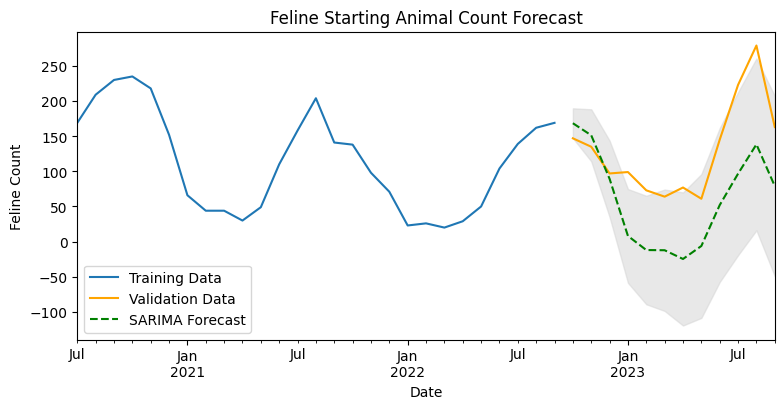

In [31]:
# Plot the forecast along with the historical data
fig, ax = plt.subplots(figsize=(9, 4))
train_ts.plot(ax=ax, label='Training Data')
valid_ts.plot(ax=ax, label='Validation Data', color='orange')
forecast_series_sarima.plot(ax=ax, style='--', label='SARIMA Forecast', color='green')

# Fill the confidence interval
ax.fill_between(forecast_conf_int.index,
                forecast_conf_int.iloc[:, 0],
                forecast_conf_int.iloc[:, 1], color='lightgrey', alpha=0.5)

ax.set_title('Feline Starting Animal Count Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Feline Count')
ax.legend()

plt.show()

It seems like S-ARIMA doesn't work out like intended. For some reason it's making negative prediction. This possibly happened due to the nature of the dataset - only 2022 has the full year, both 2020 and 2023 are incomplete. Either that, or I haven't identified the best possible parameters due to time constraints.